# Data Analysis of ad_worm_aging file


In this notebook we evaluate the contents of [cds_baseline.h5ad](https://zenodo.org/record/7296547/files/cds_baseline.h5ad)

The data in the ad_worm_aging file was create for this paper
[hole-body gene expression atlas of an adult metazoan](https://www.biorxiv.org/content/10.1101/2022.11.06.515345v1)



In [1]:
# Run this cell to download the data
# If you already have the data, SKIP this step

#!wget -P ./input_data https://zenodo.org/record/7296547/files/cds_baseline.h5ad

In [2]:
import os
output_dir = "./output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


## [Annotated data](https://anndata.readthedocs.io/en/latest/)

The below diagram provides a view of the overall structure of the file and the layout of the data content.
  

In [3]:
%%html
<h2>Annotated Data Scructure</h2>
<img src="https://anndata.readthedocs.io/en/latest/_images/anndata_schema.svg" width=400/>

In [4]:
# Check the version of anndata we are using
import anndata as ad
ad.__version__

'0.8.0'

In [5]:
# Load the h5ad file
input_dir='./input_data'
adult_metazoan = ad.read(f"{input_dir}/cds_baseline.h5ad")
adult_metazoan

AnnData object with n_obs × n_vars = 154251 × 20222
    obs: 'cell', 'n.umi', 'umi.quant', 'condition', 'channel', 'Size_Factor', 'num_genes_expressed', 'bg.counts.YA.C.loadings', 'bg.counts.YA.F.loadings', 'sample', 'bg.counts.YA.C.1', 'bg.counts.YA.C.2', 'bg.counts.YA.C.3', 'bg.counts.YA.F.1', 'bg.counts.YA.F.2', 'bg.counts.YA.F.3', 'cluster', 'assigned_cell_type', 'cell_type_group'
    var: 'id', 'gene_short_name', 'num_cells_expressed', 'use_for_ordering'
    uns: 'X_name', 'cds_version', 'citations'
    obsm: 'Aligned', 'PCA', 'UMAP'

In [6]:
adult_metazoan.uns['cds_version']

'1.0.0'

## Evaluation of observations data

In [7]:
# Let's take a look at observations
obs_df = adult_metazoan.obs
obs_df

,cell,n.umi,umi.quant,condition,channel,Size_Factor,num_genes_expressed,bg.counts.YA.C.loadings,bg.counts.YA.F.loadings,sample,bg.counts.YA.C.1,bg.counts.YA.C.2,bg.counts.YA.C.3,bg.counts.YA.F.1,bg.counts.YA.F.2,bg.counts.YA.F.3,cluster,assigned_cell_type,cell_type_group
AAACCCAAGAGCATAT-YA.C.1_1,AAACCCAAGAGCATAT-YA.C.1,14358.0,0.999870,Control,channel_1,6.938175,2048,4.755645,5.016075,1,50.340539,11.979869,5.000279,39.995378,35.109120,-12.299341,25,Mature sperm,Germline
AAACCCAAGAGTCCGA-YA.C.1_1,AAACCCAAGAGTCCGA-YA.C.1,3029.0,0.999584,Control,channel_1,2.634118,847,3.636841,2.852419,1,9.920624,-21.549929,-29.205163,5.920338,-15.138413,-29.360190,26,hyp7 (hypodermis),Hypodermis
AAACCCAAGGCACCAA-YA.C.1_1,AAACCCAAGGCACCAA-YA.C.1,2055.0,0.999441,Control,channel_1,1.047053,774,8.147252,9.498474,1,-5.532245,15.636698,-0.323547,-7.277592,11.535314,3.562098,98,Spermatheca bag distal,Somatic gonad
AAACCCAAGTATCCTG-YA.C.1_1,AAACCCAAGTATCCTG-YA.C.1,14244.0,0.999869,Control,channel_1,12.629688,2991,-3.476010,-2.710223,1,-1.988961,1.635925,18.765959,6.475197,-5.926722,20.970288,22,Mitotic germ cells,Germline
AAACCCACACACTGGC-YA.C.1_1,AAACCCACACACTGGC-YA.C.1,802.0,0.998490,Control,channel_1,0.584567,500,2.792437,2.746773,1,0.493547,1.024362,4.867547,3.487626,-1.943538,5.525796,14,Differentiated germ,Germline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCAGTGTTG-YA.C.4_3,TTTGTTGTCAGTGTTG-YA.C.4,4993.0,0.999662,Control,channel_4,4.427029,-2147483648,NaN,NaN,3,55.396826,11.091631,5.599955,44.684674,36.521920,-13.037500,6,Mature sperm,Germline
TTTGTTGTCCATACAG-YA.C.4_3,TTTGTTGTCCATACAG-YA.C.4,851.0,0.997980,Control,channel_4,0.427732,-2147483648,NaN,NaN,3,-4.181464,18.652682,0.239774,-6.772101,16.801096,-0.030777,52,Spermatheca neck distal,Somatic gonad
TTTGTTGTCCGTAATG-YA.C.4_3,TTTGTTGTCCGTAATG-YA.C.4,1178.0,0.998591,Control,channel_4,0.499021,-2147483648,NaN,NaN,3,-10.518883,-11.521123,-9.690624,-13.407579,-12.146254,-7.581564,141,RMF,Neurons
TTTGTTGTCTACTATC-YA.C.4_3,TTTGTTGTCTACTATC-YA.C.4,749.0,0.997635,Control,channel_4,0.612192,-2147483648,NaN,NaN,3,-2.484966,5.192559,6.033446,0.087290,0.105120,5.820013,28,Intestine posterior,Intestine


### Questions on the cluster naming convension

What naming/numbering convention is used for cell type/cluster names (`annotate_name`)? e.g., the 41 in this example 41_2:marginal. An initial hypothesis is that this is the order in which the UMAP algorithm discovered the clusters.

What is the meaning of the prefixes _0, _1, _2 on the annotate_names? e.g., the _2 in this example 41_2:marginal. An initial hypothesis is that cluster definitions were defined and then a refinement pass on clusters further broke down the cluster groups identifying additional clusters.



In [8]:
# Let's confirm that annotate_name aligns with cell types
# FROM PAPER: "Identification of over 163 distinct C. elegans cell types and subtypes "

# Yes, we see 163 Unique Cell types
cell_types = obs_df['assigned_cell_type'].unique()
print(f"Cell types = {len(cell_types)}")

print("Cell Types")
# All we are doing here is prefixing the cell_type names with spaces so we align on the : (colon)
print(*sorted(list(cell_types)), sep='\n')


Cell types = 163
Cell Types
ADF
ADL
AFD
AIA
AIB
AIM
AIN
AIY
AIZ
ALA
ASE
ASG
ASH
ASI
ASJ
ASK
AS_DA_DB_VA_VB_SAB
AUA
AVA
AVB
AVD
AVE
AVF
AVH
AVJ
AVK
AVL
AWA
AWB
AWC
Amphid sheath
Amphid socket
Anal muscle
Apoptotic germ cells
Arcade cells
BAG
BDU
Body wall muscle anterior
Body wall muscle middle
Body wall muscle posterior
CAN
CEP_ADE_PDE
Cephalic and inner labial socket
Cephalic sheath
Coelomocytes
DVA
DVB
DVC
Differentiated germ
Distal tip
Dorsal uterine cell
Embryonic cells
Excretory cells
Excretory duct
Excretory gland
GLR
Glia_1
Glia_2
Glia_3
Glia_4
HSN
Hypodermis head
Hypodermis tail
I1
I5
IL1
IL2
Intestinal-rectal valve
Intestine anterior
Intestine middle
Intestine posterior
M1
M2_M3_M4
M5
MI
Marginal cells
Mature sperm
Meiotic germ cells
Mitotic germ cells
OLQ
Oocytes
PDA
PHA_PHB
PLM_ALM
PVC
PVD_FLP
PVM_AVM
PVN
PVP
PVQ
PVR
PVT
PVW
Phasmid sheath
Phasmid socket
RIA
RIB
RIC
RID
RIF
RIG
RIH
RIM
RIP
RIR
RIS
RIV
RMD
RME
RMF
RMG
RMH
SDQ
SIA
SIB
SMB_PLN
SMD
Seam cells (bus+)
Seam cells (

In [9]:

cell_type_group = obs_df['cell_type_group'].unique()
print(f"Cell type Groups = {len(cell_type_group)}")

print("Cell Type Groups")

print(*sorted(list(cell_type_group)), sep='\n')


Cell type Groups = 18
Cell Type Groups
Atypical cells
Body wall muscle
Coelomocytes
Egg-laying apparatus
Embryonic
Excretory
GLR cells
Germline
Head mesodermal cell
Hypodermis
Intestine
Neurons
Pharynx
Rectum
Seam
Somatic gonad
Support cells
Unassigned


## Evaluation of Var Data

In [10]:
#var: 'id', 'gene_short_name', 'num_cells_expressed', 'use_for_ordering'
var_df = adult_metazoan.var
var_df

,id,gene_short_name,num_cells_expressed,use_for_ordering
WBGene00010957,WBGene00010957,nduo-6,70940,FALSE
WBGene00010958,WBGene00010958,ndfl-4,51381,FALSE
WBGene00010959,WBGene00010959,nduo-1,49971,FALSE
WBGene00010960,WBGene00010960,atp-6,71492,FALSE
WBGene00010961,WBGene00010961,nduo-2,30773,FALSE
...,...,...,...,...
WBGene00021597,WBGene00021597,spsb-1,4700,FALSE
WBGene00021596,WBGene00021596,spsb-2,4434,FALSE
WBGene00021595,WBGene00021595,Y46E12BL.2,6823,FALSE
WBGene00021594,WBGene00021594,tig-3,199,FALSE


## Evaluation of the X Data

In [11]:
import pandas as pd
from scipy.sparse import csr_matrix


x_df = pd.DataFrame(data=csr_matrix.todense(adult_metazoan.X))
x_df

,0,1,2,3,4,5,6,7,8,9,...,20212,20213,20214,20215,20216,20217,20218,20219,20220,20221
0,0.787005,0.000000,0.303578,0.633858,0.000000,0.000000,0.573823,0.000000,0.000000,0.329533,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,8.930314,0.000000,1.983197,9.926064,0.992940,4.955720,13.854450,0.990694,0.000000,6.931626,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,4.270398,0.710869,0.000000,2.678320,0.980217,1.063048,2.268123,0.000000,1.571009,1.179672,...,0.0,0.0,0.0,0.0,0.0,0.549133,0.0,0.0,0.0,0.0
3,10.982734,0.000000,0.998296,7.988013,0.998570,0.000000,1.995776,0.998111,2.989734,3.992067,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,3.725940,0.000000,2.778128,0.934394,0.000000,0.922319,3.639583,0.000000,1.723150,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154246,7.729475,0.000000,2.909333,8.661174,0.000000,0.000000,0.000000,2.904478,0.000000,3.857648,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
154247,3.753741,0.090531,0.318308,1.653549,0.000000,0.179716,0.935778,0.000000,0.828066,0.407543,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
154248,21.388600,3.360813,3.270876,11.250230,0.643124,1.857219,5.285266,2.570040,3.712769,0.632199,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
154249,13.873548,4.617840,3.692701,12.927728,0.000000,0.932559,8.281802,0.925175,0.925244,1.850381,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Evaluation of obsm: 'X_umap', 'scvi'

In [12]:
X_umap = adult_metazoan.obsm['UMAP']
print(type(X_umap))
print(X_umap.shape)
print(X_umap)
print(X_umap.T)

<class 'numpy.ndarray'>
(154251, 2)
[[ 9.71628519 -9.18808078]
 [-9.16463903 -2.69145011]
 [-7.41694072  9.41034604]
 ...
 [ 9.34149786  8.74385549]
 [-0.03859315 -9.88680171]
 [ 1.17187097  9.47169591]]
[[ 9.71628519 -9.16463903 -7.41694072 ...  9.34149786 -0.03859315
   1.17187097]
 [-9.18808078 -2.69145011  9.41034604 ...  8.74385549 -9.88680171
   9.47169591]]


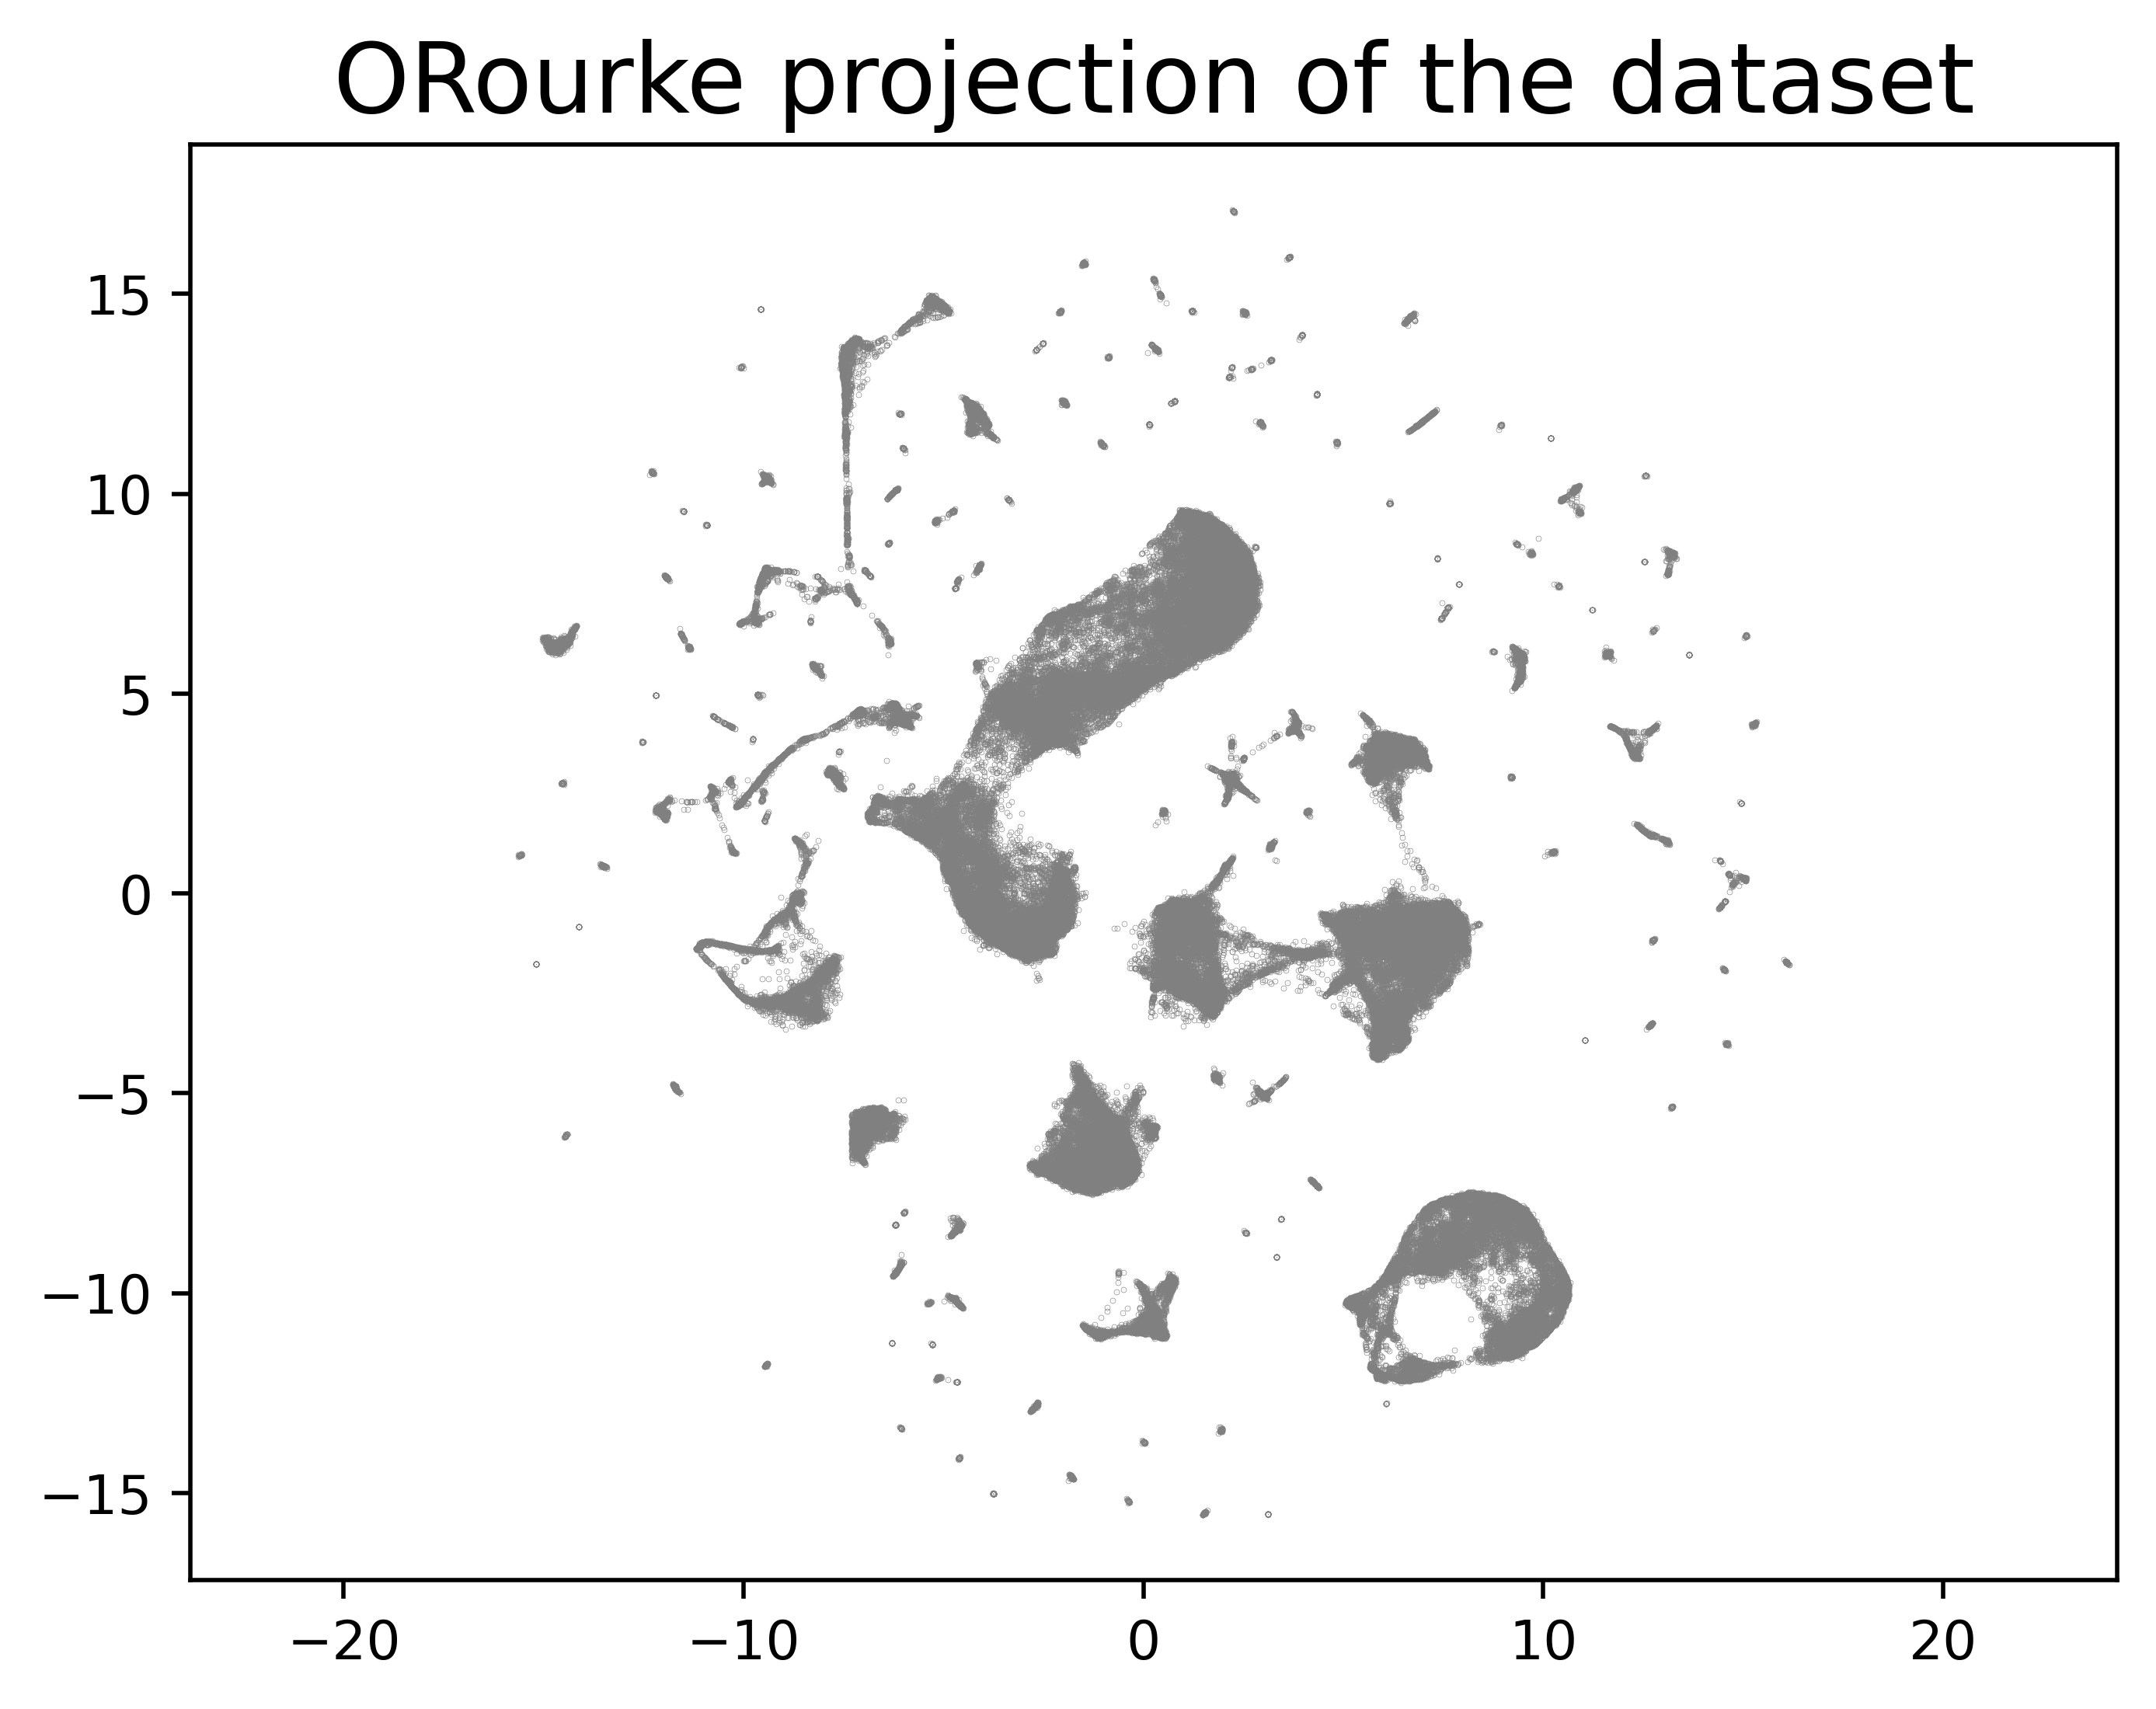

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.dpi'] = 500
#plt.scatter(X_umap.T[0],X_umap.T[1],  cmap='Spectral', s=.01)
plt.scatter(X_umap.T[0],X_umap.T[1], c='grey',  s=.008)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('ORourke projection of the dataset', fontsize=18);

In [14]:
# Create a category type list 
import matplotlib.pyplot as plt

def cell_type_group(row, cell_type_group):
    ret_val='other'
    for cat in cell_type_group:
        if cat in row['cell_type_group']:
            ret_val=cat
            break
    return ret_val

cell_type_group_series = obs_df['cell_type_group'].unique()
cell_type_group_list = list(cell_type_group_series)

obs_df['category'] = obs_df.apply(lambda row: cell_type_group(row, cell_type_group_list), axis=1)

colors = {}
cm = plt.get_cmap('gist_rainbow')
for index, group in enumerate(cell_type_group_list):
    color= cm(1.*index/len(cell_type_group_list))
    colors[group]=color

colors['Unassigned']='#7f7f7f'
colors['Hypodermis']='#a65728'
colors    

{'Germline': (1.0, 0.0, 0.16, 1.0),
 'Hypodermis': '#a65728',
 'Somatic gonad': (1.0, 0.4313725490196079, 0.0, 1.0),
 'Egg-laying apparatus': (1.0, 0.7281399046104929, 0.0, 1.0),
 'Body wall muscle': (0.9750927397986221, 1.0, 0.0, 1.0),
 'Pharynx': (0.6571277159512453, 1.0, 0.0, 1.0),
 'Neurons': (0.36036036036036034, 1.0, 0.0, 1.0),
 'Support cells': (0.06359300476947538, 1.0, 0.0, 1.0),
 'Excretory': (0.0, 1.0, 0.23192072527935917, 1.0),
 'Seam': (0.0, 1.0, 0.5481762597512125, 1.0),
 'Intestine': (0.0, 1.0, 0.8433480919249424, 1.0),
 'Rectum': (0.0, 0.8599744245524292, 1.0, 1.0),
 'Coelomocytes': (0.0, 0.5615942028985503, 1.0, 1.0),
 'Unassigned': '#7f7f7f',
 'Head mesodermal cell': (0.056479113384484365, 0.0, 1.0, 1.0),
 'Atypical cells': (0.35485933503836337, 0.0, 1.0, 1.0),
 'GLR cells': (0.6532395566922424, 0.0, 1.0, 1.0),
 'Embryonic': (0.9516197783461214, 0.0, 1.0, 1.0)}

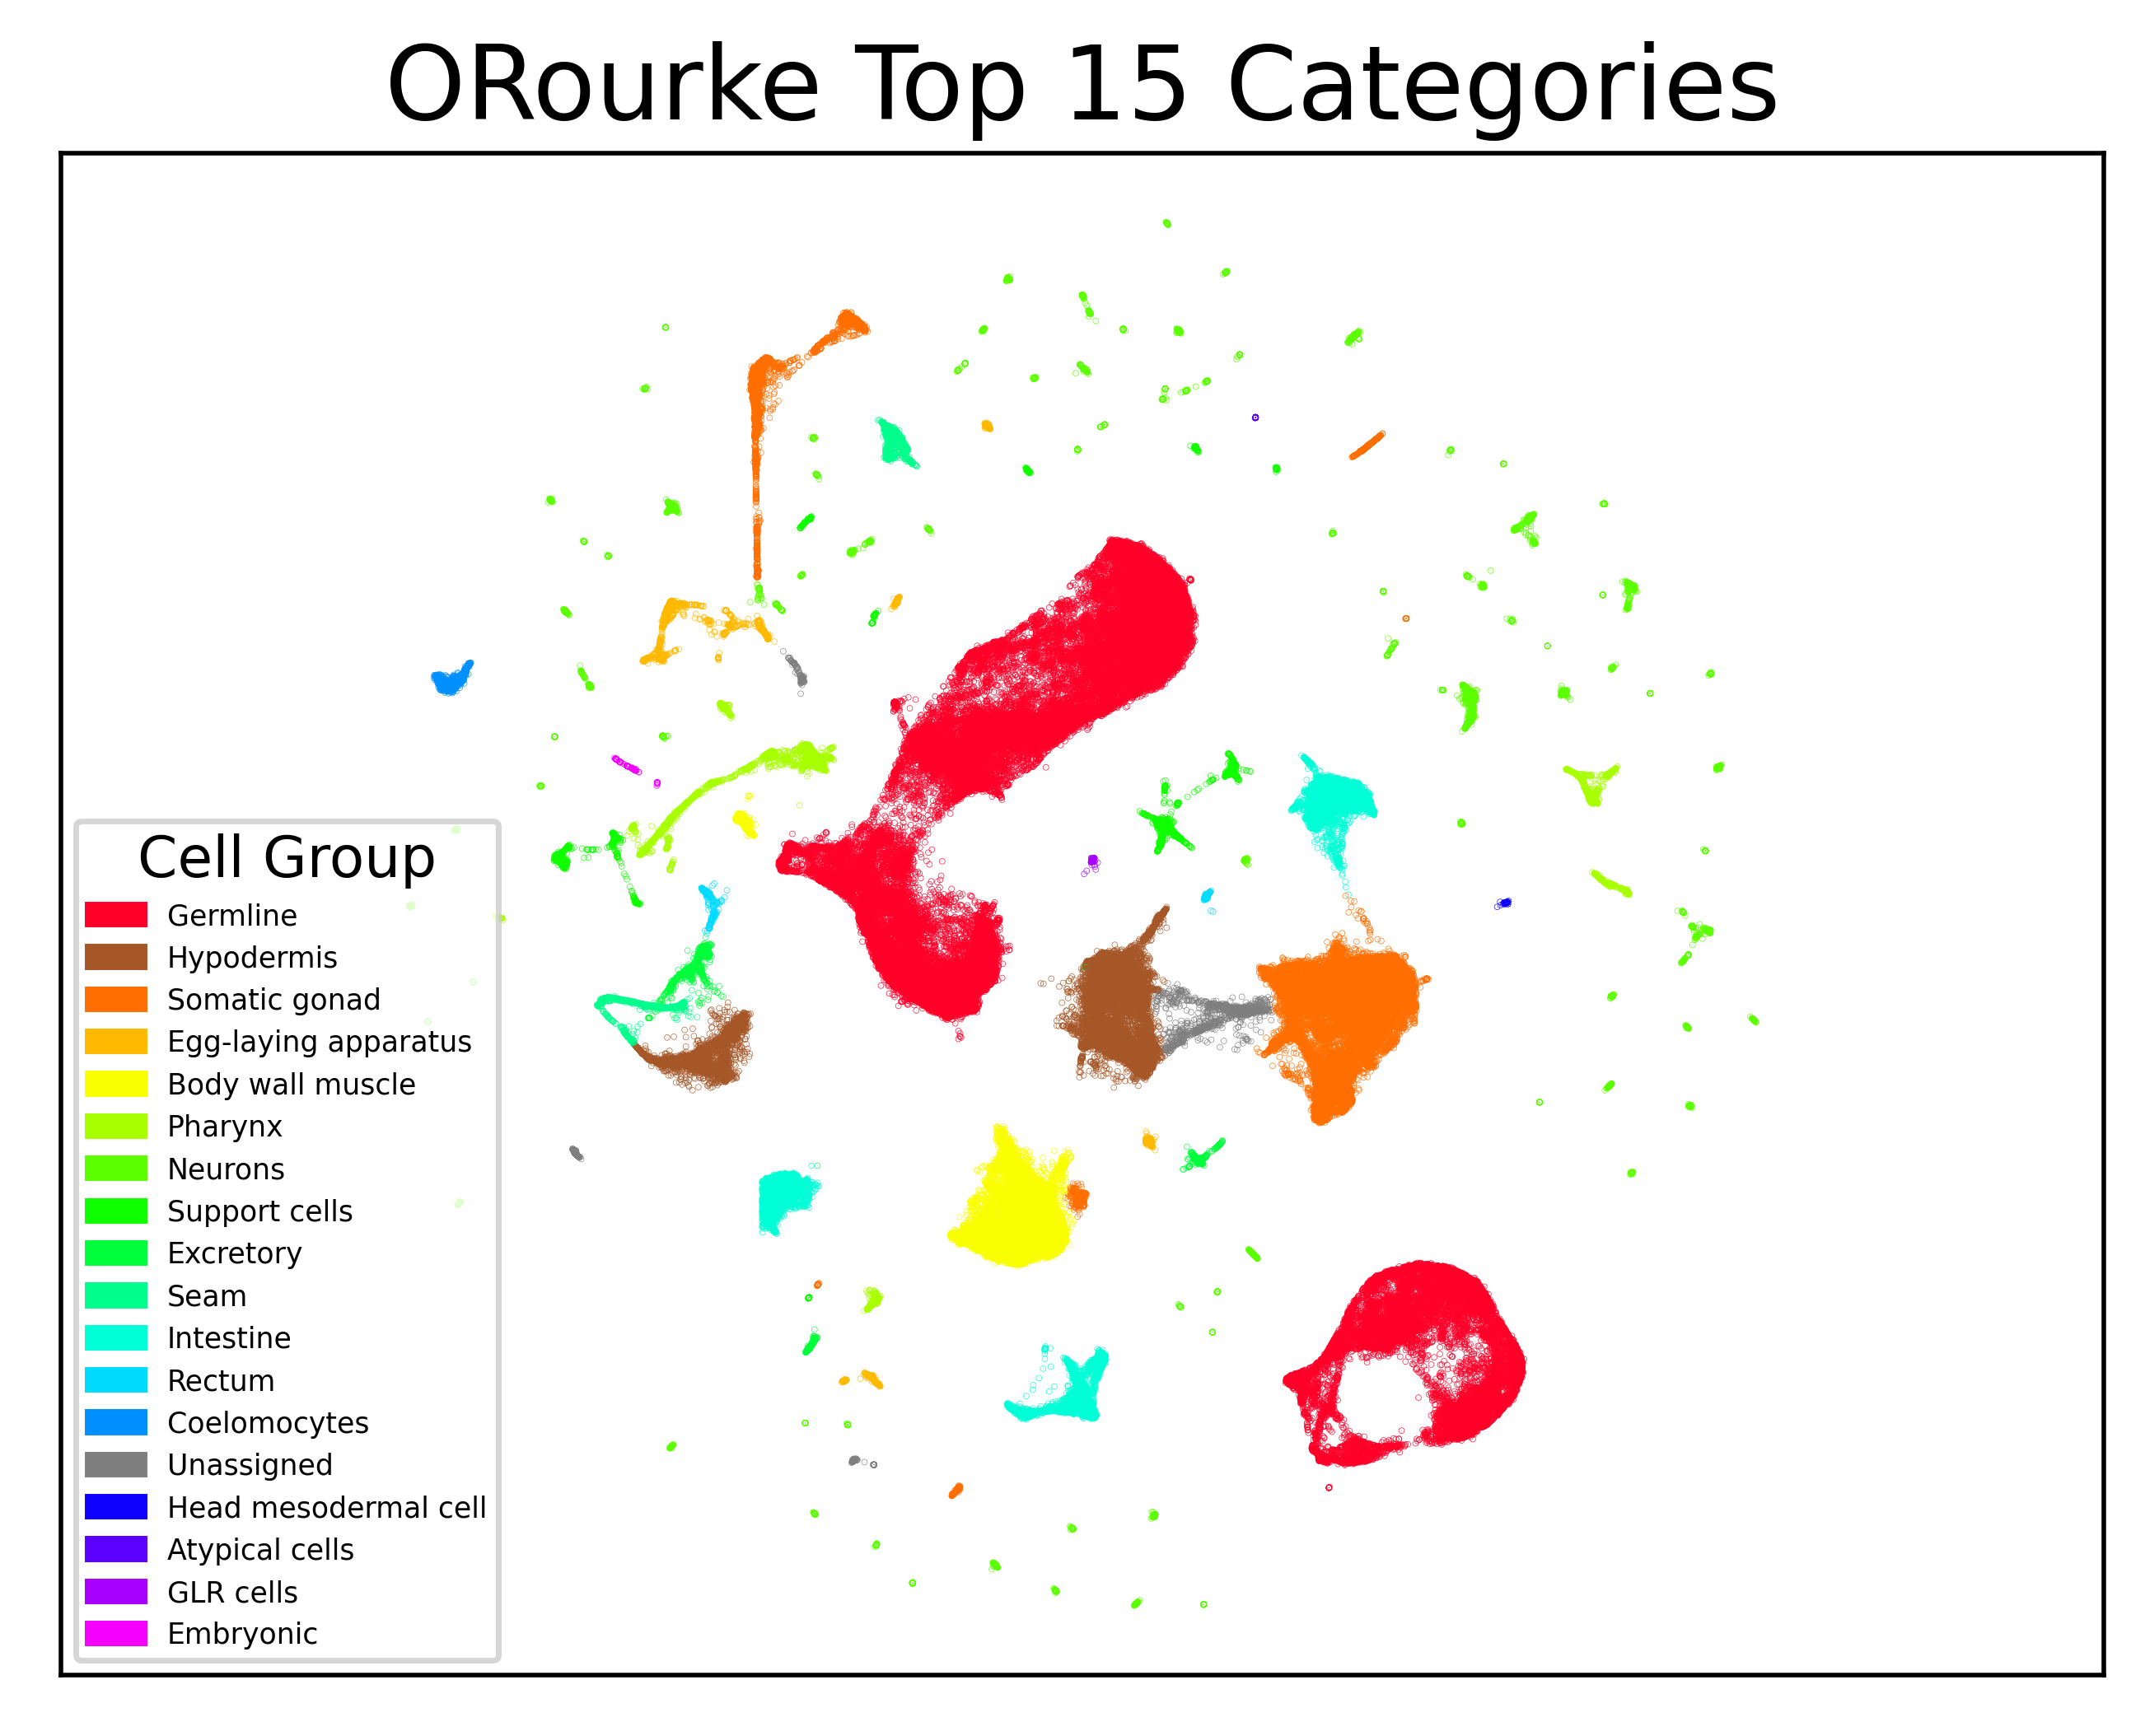

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
%matplotlib inline

# Map the categories from above to the UMAP 
X_umap = adult_metazoan.obsm['UMAP']
X_umap_df = pd.DataFrame(X_umap, columns = ['X','Y'])

# Add the category to the X_umap_df
obs2_df = obs_df.reset_index(drop=True)
X_umap_df = X_umap_df.join(obs2_df['category'])



####################################

plt.rcParams['figure.dpi'] = 500
sss = plt.scatter(X_umap_df['X'],X_umap_df['Y'], c=X_umap_df['category'].map(colors), s=.008)
plt.gca().set_aspect('equal', 'datalim')
plt.title('ORourke Top 15 Categories', fontsize=18);
plt.yticks([])
plt.xticks([])

patches = [ mpatches.Patch(color=colors[key], label=key) for key in colors.keys()]
plt.rcParams["legend.fontsize"] = 5
legend = plt.legend(handles=patches)
legend.set_title('Cell Group')

output_dir='./output_data'
file_name='orourke_top_15_cell_categories.png'
plt.savefig(f'{output_dir}/{file_name}')

In [18]:
X_umap_df['category']

0              Germline
1            Hypodermis
2         Somatic gonad
3              Germline
4              Germline
              ...      
154246         Germline
154247    Somatic gonad
154248          Neurons
154249        Intestine
154250         Germline
Name: category, Length: 154251, dtype: object